<h1><b><center>Breast Cancer Prediction</center></b></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from numpy import loadtxt
from keras.models import load_model
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [3]:
df = pd.read_csv(r"C:/Users/prera/Desktop/FinalProject/data/breast_cancer.csv")

In [4]:
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [5]:
df.shape

(569, 33)

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.drop(columns='id', axis=1, inplace=True)
df.drop(columns='Unnamed: 32', axis=1, inplace=True)

In [9]:
df.shape

(569, 31)

In [10]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
for i in df.columns:
    print(f'{i} : {df[i].nunique()} values')

diagnosis : 2 values
radius_mean : 456 values
texture_mean : 479 values
perimeter_mean : 522 values
area_mean : 539 values
smoothness_mean : 474 values
compactness_mean : 537 values
concavity_mean : 537 values
concave points_mean : 542 values
symmetry_mean : 432 values
fractal_dimension_mean : 499 values
radius_se : 540 values
texture_se : 519 values
perimeter_se : 533 values
area_se : 528 values
smoothness_se : 547 values
compactness_se : 541 values
concavity_se : 533 values
concave points_se : 507 values
symmetry_se : 498 values
fractal_dimension_se : 545 values
radius_worst : 457 values
texture_worst : 511 values
perimeter_worst : 514 values
area_worst : 544 values
smoothness_worst : 411 values
compactness_worst : 529 values
concavity_worst : 539 values
concave points_worst : 492 values
symmetry_worst : 500 values
fractal_dimension_worst : 535 values


In [13]:
numerical_features = []
categorical_features = []

for i in df.columns:
    if df[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [14]:
print(len(numerical_features),'Numerical features: \n', numerical_features)
print('\n\n',len(categorical_features),'Categorical features:\n ', categorical_features)

30 Numerical features: 
 ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


 1 Categorical features:
  ['diagnosis']


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# EDA

In [16]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

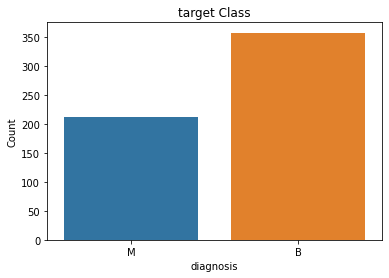

Percent of Cancer outcome:  37.26 %
Percent of not a Cancer outcome:  62.74 %


In [17]:
sns.countplot(x='diagnosis',data=df)
plt.xlabel("diagnosis")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of Cancer outcome: ',round(len(df[df['diagnosis']== 'M'])/len(df['diagnosis'])*100,2),"%")
print('Percent of not a Cancer outcome: ',round(len(df[df['diagnosis']== 'B'])/len(df['diagnosis'])*100,2),"%")

In [18]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [19]:
prediction_vars = []
for i in df.columns:
    if df[i].corr(df['diagnosis'])>0.5 and df[i].corr(df['diagnosis'])<0.95:
        prediction_vars.append(i)

In [20]:
print(prediction_vars)

['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


In [21]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
df_new = df[prediction_vars]

In [23]:
df_new.head()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.6656,0.7119,0.2654
1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.1866,0.2416,0.1860
2,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4245,0.4504,0.2430
3,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.8663,0.6869,0.2575
4,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.2050,0.4000,0.1625


In [24]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Splitting into X and y

In [26]:
x = df_new
y = df.diagnosis

In [27]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [28]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [29]:
# SMOTE
print(Counter(y))
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
Counter(y)

Counter({0: 357, 1: 212})


Counter({1: 357, 0: 357})

# Train-Test Split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0, shuffle=True)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(571, 15)
(143, 15)
(571,)
(143,)


# Logistic Regression

In [32]:
cancerlr=LogisticRegression(solver="liblinear")
cancerlr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [33]:
# Accuracy
y_pred = cancerlr.predict(x_test)
print('Accuracy of logistic regression classifier on test set:',cancerlr.score(x_test, y_test))

Accuracy of logistic regression classifier on test set: 0.951048951048951


[[75  3]
 [ 4 61]]


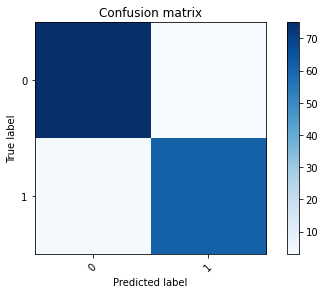

In [36]:
# Print and plot confusion matrix   
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,['0','1'])

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        78
           1       0.95      0.94      0.95        65

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



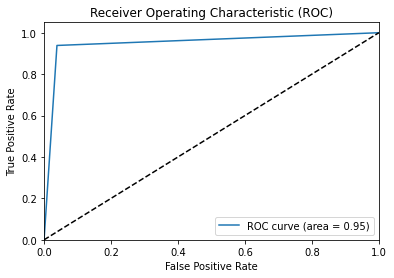

In [37]:
# Print Classification Report
print(classification_report(y_test,y_pred))
# Plot roc curve
plot_roc(y_pred,y_test)

# Naive Bayes

In [38]:
from sklearn.naive_bayes import BernoulliNB
cancerNB = BernoulliNB()
y_pred = cancerNB.fit(x_train, y_train)
y_pred = cancerNB.predict(x_test)

In [39]:
#Accuracy
print("Bernoulli Naive Bayes model accuracy on test set:",metrics.accuracy_score(y_test, y_pred))

Bernoulli Naive Bayes model accuracy on test set: 0.9230769230769231


[[75  3]
 [ 8 57]]


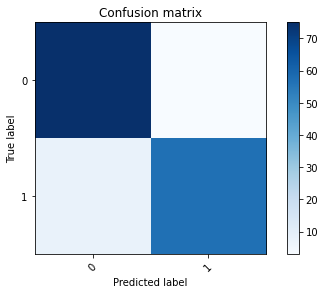

In [40]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,['0','1'])

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        78
           1       0.95      0.88      0.91        65

    accuracy                           0.92       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



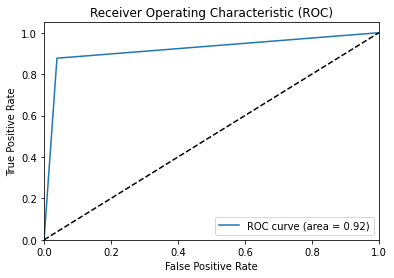

In [42]:
plot_roc(y_pred,y_test)

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
cancerrf = RandomForestClassifier()
cancerrf.fit(x_train,y_train)
y_pred=cancerrf.predict(x_test)

In [44]:
#Accuracy
print("Accuracy of Random forest on test set:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Random forest on test set: 0.958041958041958


[[76  2]
 [ 4 61]]


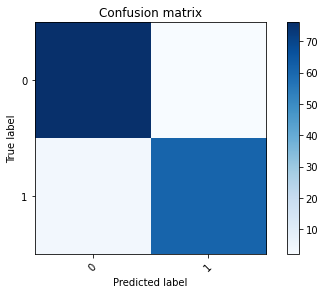

In [45]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,['0','1'])

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        78
           1       0.97      0.94      0.95        65

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



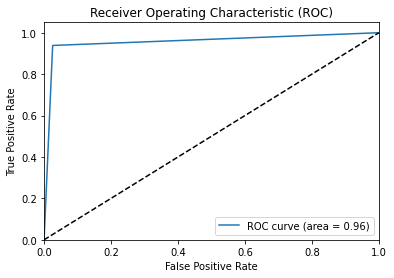

In [47]:
plot_roc(y_pred,y_test)

# XG-BOOST

In [48]:
# XG-Boost
from numpy import loadtxt
from xgboost import XGBClassifier
cancerxgb=XGBClassifier()
cancerxgb.fit(x_train,y_train)

[17:54:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
y_pred = cancerxgb.predict(x_test)
predictions = [round(value) for value in y_pred]

In [50]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for XGBoost on test set:", accuracy)

Accuracy for XGBoost on test set: 0.951048951048951


[[75  3]
 [ 4 61]]


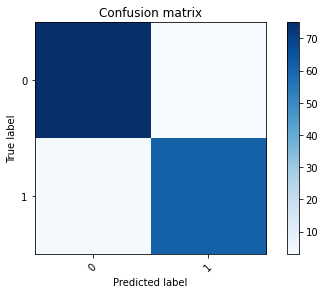

In [51]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,['0','1'])

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        78
           1       0.95      0.94      0.95        65

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



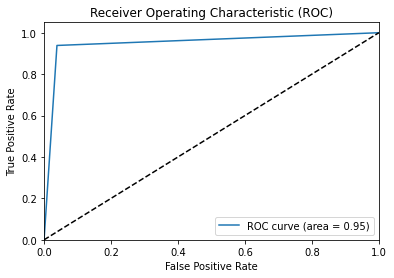

In [53]:
plot_roc(y_pred,y_test)

# Neural Network

In [54]:
# Neural Network
cancernnmodel = Sequential()
cancernnmodel.add(Dense(64, input_dim=x_train.shape[1], activation='tanh'))
cancernnmodel.add(Dense(32, activation='tanh'))
cancernnmodel.add(Dense(16, activation='tanh'))
cancernnmodel.add(Dense(1, activation='sigmoid'))

cancernnmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
                        verbose=2, mode='min')

# chckpt = ModelCheckpoint(filepath='.weights.hdf5', verbose=1, save_best_only=True)

cancernnmodel.fit(x_train,y_train,verbose=2,epochs=200, batch_size=20, callbacks=[monitor], validation_split=0.25)


Epoch 1/200
22/22 - 1s - loss: 0.4182 - accuracy: 0.8131 - val_loss: 0.1887 - val_accuracy: 0.9720
Epoch 2/200
22/22 - 0s - loss: 0.1809 - accuracy: 0.9346 - val_loss: 0.1414 - val_accuracy: 0.9720
Epoch 3/200
22/22 - 0s - loss: 0.1636 - accuracy: 0.9346 - val_loss: 0.1306 - val_accuracy: 0.9650
Epoch 4/200
22/22 - 0s - loss: 0.1527 - accuracy: 0.9369 - val_loss: 0.1219 - val_accuracy: 0.9580
Epoch 5/200
22/22 - 0s - loss: 0.1435 - accuracy: 0.9346 - val_loss: 0.1180 - val_accuracy: 0.9580
Epoch 6/200
22/22 - 0s - loss: 0.1349 - accuracy: 0.9439 - val_loss: 0.1101 - val_accuracy: 0.9720
Epoch 7/200
22/22 - 0s - loss: 0.1259 - accuracy: 0.9509 - val_loss: 0.1075 - val_accuracy: 0.9720
Epoch 8/200
22/22 - 0s - loss: 0.1191 - accuracy: 0.9509 - val_loss: 0.0998 - val_accuracy: 0.9650
Epoch 9/200
22/22 - 0s - loss: 0.1124 - accuracy: 0.9509 - val_loss: 0.0961 - val_accuracy: 0.9720
Epoch 10/200
22/22 - 0s - loss: 0.1082 - accuracy: 0.9509 - val_loss: 0.0935 - val_accuracy: 0.9720
Epoch 11/

In [55]:
cancernnmodel.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1024      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________


In [56]:
y_pred = cancernnmodel.predict(x_test)
argmax = []
for val in y_pred:
    if val >= 0.5:
      argmax.append(1)
    else:
        argmax.append(0)
argmax[:10]


[1, 0, 0, 1, 1, 0, 0, 0, 1, 1]

In [57]:
accuracy = accuracy_score(y_test,argmax)
print("Accuracy for neural network on test set:", accuracy)


Accuracy for neural network on test set: 0.951048951048951


[[76  2]
 [ 5 60]]


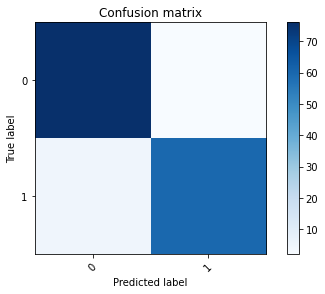

In [58]:
cm = confusion_matrix(y_test, argmax)
print(cm)
plot_confusion_matrix(cm,['0','1'])


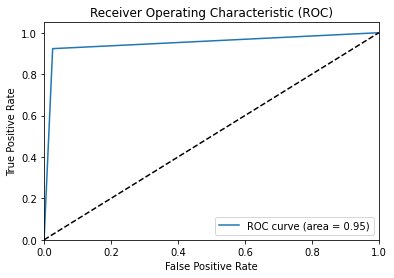

In [59]:
plot_roc(argmax,y_test)

# Saving Model

In [60]:
import pickle
pickle.dump(cancerrf,open("C:/Users/prera/Desktop/FINALPROJECT/models/cancer_model.pkl","wb"))

In [61]:
model=pickle.load(open("C:/Users/prera/Desktop/FINALPROJECT/models/cancer_model.pkl","rb"))
result = model.predict_proba(x_test)
print(result)

[[0.   1.  ]
 [1.   0.  ]
 [0.9  0.1 ]
 [0.   1.  ]
 [0.   1.  ]
 [0.65 0.35]
 [0.96 0.04]
 [0.71 0.29]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.08 0.92]
 [0.05 0.95]
 [0.12 0.88]
 [0.59 0.41]
 [0.02 0.98]
 [1.   0.  ]
 [0.01 0.99]
 [0.99 0.01]
 [0.99 0.01]
 [0.01 0.99]
 [0.92 0.08]
 [1.   0.  ]
 [1.   0.  ]
 [0.15 0.85]
 [1.   0.  ]
 [0.05 0.95]
 [0.05 0.95]
 [1.   0.  ]
 [0.05 0.95]
 [0.98 0.02]
 [0.   1.  ]
 [0.99 0.01]
 [0.2  0.8 ]
 [0.   1.  ]
 [0.91 0.09]
 [1.   0.  ]
 [0.03 0.97]
 [0.   1.  ]
 [1.   0.  ]
 [0.97 0.03]
 [0.97 0.03]
 [0.   1.  ]
 [0.03 0.97]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.99 0.01]
 [1.   0.  ]
 [0.91 0.09]
 [0.   1.  ]
 [0.96 0.04]
 [0.97 0.03]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.98 0.02]
 [0.99 0.01]
 [0.   1.  ]
 [0.77 0.23]
 [0.35 0.65]
 [0.97 0.03]
 [0.   1.  ]
 [0.96 0.04]
 [0.96 0.04]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]